# Fake News Detection

# Problem Statement: Given a news article, determine whether it is fake or real.

Fake news is a serious problem that can have a negative impact on society. It can mislead people, cause panic, and even lead to violence. Fake news detection is a challenging task, but it is important to develop effective methods to combat this problem.

# Read Dataset

In [40]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
df = pd.read_csv(r"D:\dataset EXCEl\fake_news_train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Cheack For Missing Data

In [41]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

# Replacing Missing Data With - "Not Available"

In [42]:
df = df.fillna('Not Available')

# Data Preprocessing

In [43]:
import nltk

In [44]:
# importing Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
nltk.download('punkt')
sw = stopwords.words("english")
len(sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sawan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sawan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


179

In [6]:
# Considering Lines without stopwords and removing unnecesssary punctuations
import re
lines = []
for i in df.title:
    words = ""
    Q = i.lower()
    Q = re.sub("[^a-z ]","",Q)
    Q = Q.split(" ")
    #print(Q)
    for j in Q:      
        if(j not in sw):
            words = words + " " + j
    lines.append(words)
    

In [7]:
lines[0:5]

[' house dem aide didnt even see comeys letter jason chaffetz tweeted',
 ' flynn hillary clinton big woman campus  breitbart',
 ' truth might get fired',
 '  civilians killed single us airstrike identified',
 ' iranian woman jailed fictional unpublished story woman stoned death adultery']

In [8]:
# TFIDF Vectorization of all lines

from sklearn.feature_extraction.text import TfidfVectorizer
ti = TfidfVectorizer()
X = ti.fit_transform(pd.Series(lines)).toarray()
Y = df.label

In [9]:
X.shape

(20800, 22870)

In [10]:
Y.shape

(20800,)

# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(X,Y,test_size=0.2,random_state=21,stratify=Y)

In [12]:
xtrain.shape

(16640, 22870)

In [13]:
xtest.shape

(4160, 22870)

In [14]:
ytest.shape

(4160,)

# Building A Nueral Network With Keras

In [15]:

from keras.models import Sequential
from keras.layers import Dense, Dropout

nn = Sequential()
nn.add(Dense(256,input_dim=X.shape[1],activation='relu'))
nn.add(Dropout(0.3))
nn.add(Dense(256,activation='relu'))
nn.add(Dropout(0.3))
nn.add(Dense(256,activation='relu'))
nn.add(Dropout(0.3))
nn.add(Dense(1,activation='sigmoid'))

In [16]:
# Compile Model
nn.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')


In [17]:
# Fit the model
model = nn.fit(xtrain,ytrain, validation_data=(xtest,ytest),epochs=5)

Epoch 1/5
520/520 [==============================] - 53s 100ms/step - loss: 0.2405 - accuracy: 0.9033 - val_loss: 0.1687 - val_accuracy: 0.9337
Epoch 2/5
520/520 [==============================] - 50s 96ms/step - loss: 0.0630 - accuracy: 0.9782 - val_loss: 0.2081 - val_accuracy: 0.9281
Epoch 3/5
520/520 [==============================] - 51s 98ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.3085 - val_accuracy: 0.9231
Epoch 4/5
520/520 [==============================] - 47s 91ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.4393 - val_accuracy: 0.9269
Epoch 5/5
520/520 [==============================] - 46s 89ms/step - loss: 4.8236e-04 - accuracy: 0.9999 - val_loss: 0.4667 - val_accuracy: 0.9296


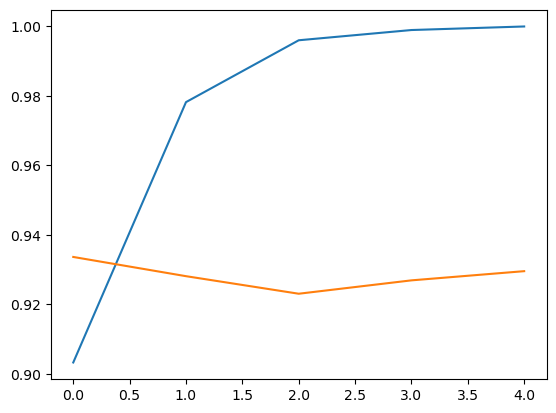

In [18]:
import matplotlib.pyplot as plt
plt.plot(model.history["accuracy"])
plt.plot(model.history["val_accuracy"])
plt.show()

# Evaluate Model

In [19]:
tr_pred = nn.predict(xtrain)
ts_pred = nn.predict(xtest)

130/130 [==============================] - 1s 10ms/step


In [20]:
tr_pred1 = []

for i in tr_pred:
    if i>0.5:
        tr_pred1.append(1)
    else:
        tr_pred1.append(0)

In [21]:
ts_pred1 = []

for i in ts_pred:
    if i>0.5:
        ts_pred1.append(1)
        
    else:
        ts_pred1.append(0)

In [22]:
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred1)
ts_acc = accuracy_score(ytest,ts_pred1)
print('Training Accuracy of Model is : ',round(tr_acc,4))
print('Testing Accuracy of Model is  : ',round(ts_acc,4))

Training Accuracy of Model is :  0.9999
Testing Accuracy of Model is  :  0.9296


# Confusion Matrix For Testing Split

<AxesSubplot:>

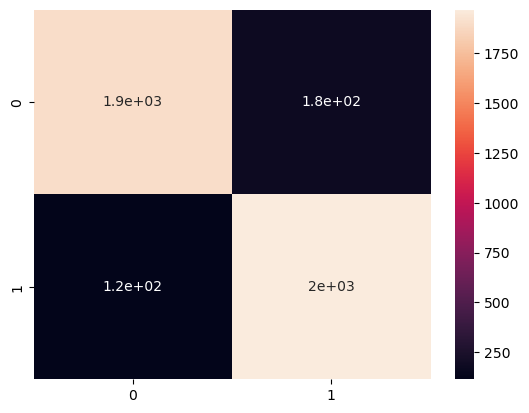

In [23]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ts_pred1)
import seaborn as sb
sb.heatmap(cf,annot=True)

# Classification Report

In [24]:
from sklearn.metrics import classification_report
cr = classification_report(ytest,ts_pred1)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2077
           1       0.92      0.94      0.93      2083

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160



# Predicting with fake news with test.csv file

In [25]:
df_test = pd.read_csv(r"D:\dataset EXCEl\fake_news_test.csv")
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


# Data Preprocessing for df_test

In [26]:

df_test.isna().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [27]:
df_test = df_test.fillna('Not Available')

In [28]:

import re
lines_test = []
for i in df_test.title:
    words = ""
    Q = i.lower()
    Q = re.sub("[^a-z ]","",Q)
    Q = Q.split(" ")
    #print(Q)
    for j in Q:      
        if(j not in sw):
            words = words + " " + j
    lines_test.append(words)

In [29]:
X_test = ti.transform(pd.Series(lines_test)).toarray()

In [30]:

X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
X_test.shape

(5200, 22870)

# Predictions

In [32]:
test_pred = nn.predict(X_test)

163/163 [==============================] - 1s 8ms/step


In [33]:

test_pred1 = []
for i in test_pred:
    if i>0.5:
        test_pred1.append(1)
    else:
        test_pred1.append(0)

# Creating DataFrame with above test predictions

In [34]:
idx = list(df_test['id'])
df_out = pd.DataFrame({'id':idx, 'label':test_pred1})

In [35]:
df_out.head()

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1


In [36]:

df_out.groupby(by='label').count()

,id
label,
0,2529
1,2671


<AxesSubplot:xlabel='label'>

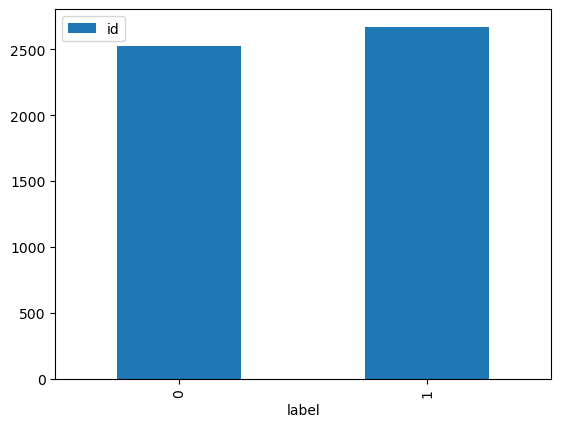

In [37]:
df_out.groupby(by='label').count().plot(kind='bar')

In [38]:
##########################